In [1]:
using Multilane
using POMDPToolbox
using POMDPs
using MCTS
using GenerativeModels

INFO: Recompiling stale cache file /home/zach/.julia/lib/v0.4/POMDPs.ji for module POMDPs.


INFO: Recompiling stale cache file /home/zach/.julia/lib/v0.4/PyPlot.ji for module PyPlot.
INFO: Recompiling stale cache file /home/zach/.julia/lib/v0.4/PyCall.ji for module PyCall.


In [2]:
#Set up problem configuration
nb_lanes = 4
pp = PhysicalParam(nb_lanes,lane_length=100.) #2.=>col_length=8
_discount = 1.
nb_cars=10

rmodel = NoCrashRewardModel()

dmodel = NoCrashIDMMOBILModel(nb_cars, pp)

mdp = NoCrashMDP(dmodel, rmodel, _discount);

rng = MersenneTwister(5)

s = initial_state(mdp::NoCrashMDP, rng)
# @show s.env_cars[1]
#visualize(mdp,s,MLAction(0,0))

policy = RandomPolicy(mdp)

sim = HistoryRecorder(rng=rng, max_steps=100) # initialize a random number generator

simulate(sim, mdp, policy, s)

110.0

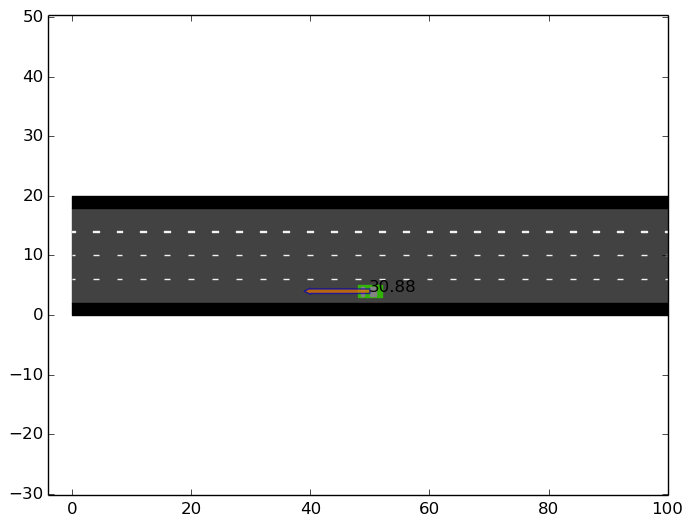

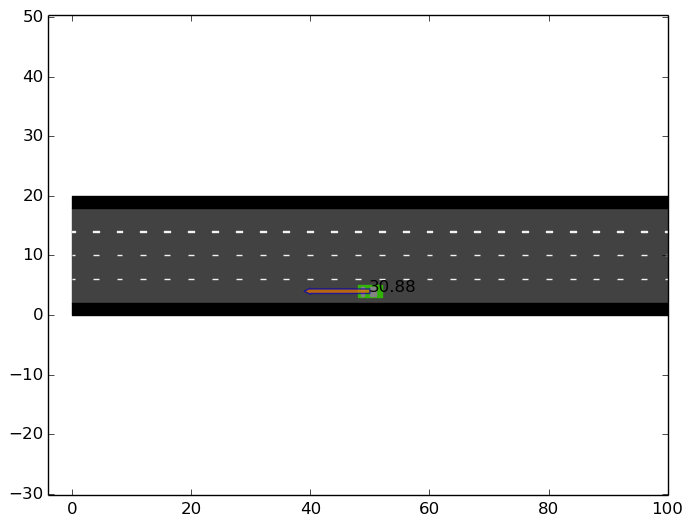

In [4]:
using PyPlot
visualize(mdp, sim.state_hist[1], sim.action_hist[1], sim.state_hist[2])
# savefig("scene_1.pdf")